##Importing Libraries

In [1]:
#!pip install chart_studio

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Dropout
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
#from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import tensorflow 


%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
tensorflow.random.set_seed(1)
seed(1)

##Data Loading

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
dir = "drive/MyDrive/Colab_Notebooks/data_"
prices_df = pd.read_csv(dir+'/prices.csv')


Mounted at /content/drive


In [3]:
prices_df = pd.read_csv(dir+'/prices.csv')

TypeError: ignored

In [4]:
prices_df = pd.read_csv('prices.csv')

In [ ]:
prices_df.head()

,dates,hours,prices
0,01.10.2018,00:00,59.53
1,01.10.2018,01:00,56.10
2,01.10.2018,02:00,51.41
3,01.10.2018,03:00,47.38
4,01.10.2018,04:00,47.59


In [ ]:
"""
def restructering(data, input_days):
    x = []
    y = []

    day_len = 24
    num_hours = len(data)
    num_of_days = num_hours//day_len
    if (num_hours % day_len != 0):
      print("something's wrong, I can feel it ! ")
    data_ = data.reshape(num_of_days,day_len)
    print(data_.shape)
    
    num_of_lines = len(data_)//input_days
    for i in range(num_of_days-input_days):
        _x = data_[i:(i+input_days)]
        _y = data_[i+input_days]
        _x = _x.flatten()
        _y = _y.flatten()
        x.append(_x)
        y.append(_y)



    return np.array(x),np.array(y)
"""

'\ndef restructering(data, input_days):\n    x = []\n    y = []\n\n    day_len = 24\n    num_hours = len(data)\n    num_of_days = num_hours//day_len\n    if (num_hours % day_len != 0):\n      print("something\'s wrong, I can feel it ! ")\n    data_ = data.reshape(num_of_days,day_len)\n    print(data_.shape)\n    \n    num_of_lines = len(data_)//input_days\n    for i in range(num_of_days-input_days):\n        _x = data_[i:(i+input_days)]\n        _y = data_[i+input_days]\n        _x = _x.flatten()\n        _y = _y.flatten()\n        x.append(_x)\n        y.append(_y)\n\n\n\n    return np.array(x),np.array(y)\n'

In [5]:
def restructuring(data, n):
  x = []
  y = []

  hours = len(data)
  days = hours//24

  for i in range(0,len(data)-(n+1)*24,24):
    _x = data[i:n*24+i]
    x.append(_x)

  for i in range(n*24,len(data)-24,24):
    _y = data[i:i+24]
    y.append(_y)


  return np.array(x), np.array(y)
  
    

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
prices_arr = prices_df['prices'].values
scaled_data = scaler.fit_transform(prices_arr.reshape(-1,1))

In [7]:
n = 5

x, y = restructuring(scaled_data, n)

In [8]:
train_size = int(len(y)*0.67)
test_size = len(y) - train_size

In [9]:
trainX = x[0:train_size]
trainY = y[0:train_size]

In [10]:
testX = x[train_size:len(x)]
testY = y[train_size:len(y)]

In [11]:
print(testX[0].shape)
print(testY[0].shape)

(120, 1)
(24, 1)


##Model Definition

###MLP

In [12]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=120))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_dim=256))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', input_dim=512))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', input_dim=128))
model.add(Dense(24))
optimizer = tensorflow.keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=optimizer, loss='mse')

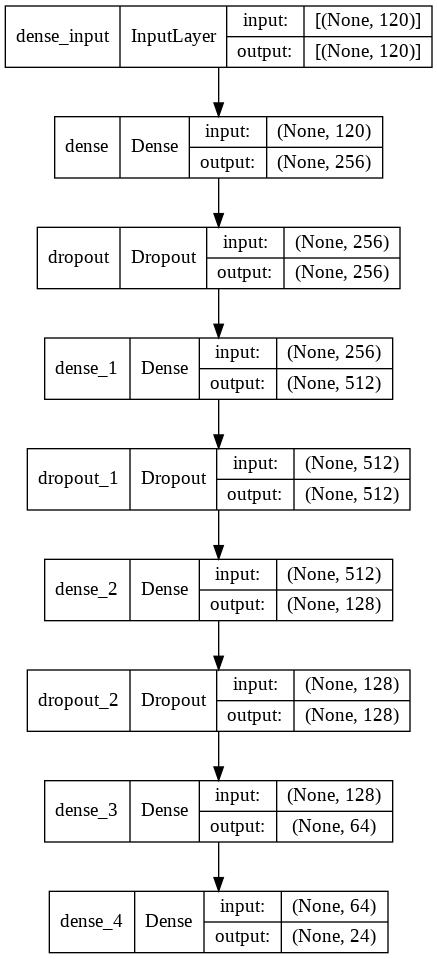

In [13]:
plot_model(model, to_file='my_mlp_dayahead.png', show_shapes=True, show_layer_names=True)

In [14]:
history = model.fit(trainX,trainY,epochs=80,validation_data=(testX,testY))

Epoch 1/80
23/23 [==============================] - 1s 13ms/step - loss: 0.1432 - val_loss: 0.1870
Epoch 2/80
23/23 [==============================] - 0s 6ms/step - loss: 0.1276 - val_loss: 0.1609
Epoch 3/80
23/23 [==============================] - 0s 6ms/step - loss: 0.1121 - val_loss: 0.1382
Epoch 4/80
23/23 [==============================] - 0s 8ms/step - loss: 0.0990 - val_loss: 0.1198
Epoch 5/80
23/23 [==============================] - 0s 6ms/step - loss: 0.0886 - val_loss: 0.1050
Epoch 6/80
23/23 [==============================] - 0s 6ms/step - loss: 0.0785 - val_loss: 0.0929
Epoch 7/80
23/23 [==============================] - 0s 6ms/step - loss: 0.0712 - val_loss: 0.0826
Epoch 8/80
23/23 [==============================] - 0s 6ms/step - loss: 0.0641 - val_loss: 0.0733
Epoch 9/80
23/23 [==============================] - 0s 6ms/step - loss: 0.0587 - val_loss: 0.0654
Epoch 10/80
23/23 [==============================] - 0s 6ms/step - loss: 0.0543 - val_loss: 0.0588
Epoch 11/80
23/23 

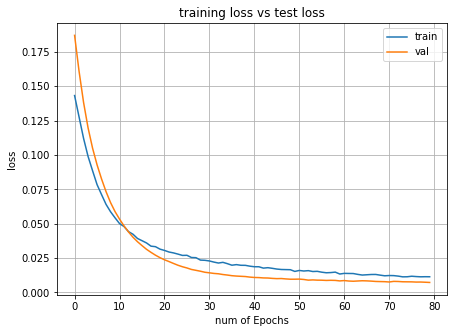

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
xc=range(80)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('training loss vs test loss')
plt.grid(True)
plt.legend(['train','val'])

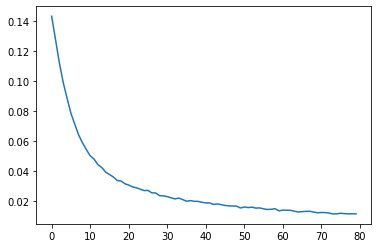

In [16]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [17]:
train_y_hat = model.predict(trainX)
test_y_hat = model.predict(testX)


In [18]:
print(trainY.shape)
trainY=trainY.reshape(730,24)
print(trainY[0])
print(trainY.shape)
print(train_y_hat.shape)
print(train_y_hat[0])

(730, 24, 1)
[0.42844474 0.43725154 0.43278699 0.43119687 0.42813895 0.41868999
 0.43740444 0.46596538 0.47088863 0.49149899 0.47336554 0.45584368
 0.45260229 0.43275641 0.42875054 0.42578436 0.44284753 0.45850407
 0.4955966  0.52681793 0.49113204 0.46296863 0.44960553 0.41731393]
(730, 24)
(730, 24)
[0.33724895 0.36057866 0.38810572 0.3651705  0.34240538 0.39551803
 0.3593736  0.4006575  0.45754823 0.3553108  0.3875107  0.3474935
 0.40442252 0.3781601  0.37644228 0.3766494  0.35939047 0.40524083
 0.41922352 0.44685662 0.40840146 0.410805   0.41351846 0.41044104]


In [19]:
print(testY.shape)
print(test_y_hat.shape)
testY=testY.reshape(360,24)
print(testY.shape)

(360, 24, 1)
(360, 24)
(360, 24)


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score, mean_absolute_error
#train_mape = mean_absolute_percentage_error(trainY,train_y_hat)
#test_mape = mean_absolute_percentage_error(testY, test_y_hat)
train_r2 = r2_score(trainY, train_y_hat)
test_r2 = r2_score(testY,test_y_hat)
train_mse = mean_squared_error(trainY, train_y_hat)
test_mse = mean_squared_error(testY,test_y_hat)
train_mape = mean_absolute_percentage_error(trainY,train_y_hat)
test_mape = mean_absolute_percentage_error(testY, test_y_hat)
train_mae = mean_absolute_error(trainY,train_y_hat)
test_mae = mean_absolute_error(testY, test_y_hat)


In [21]:
print('Training MSE :',train_mse)
print('Training MAPE: ',train_mape)
print('Training MAE :',train_mae)

print('Test MSE :',test_mse)
print('Test MAPE :', test_mape)
print('Test MAE :',test_mae)

Training MSE : 0.0037484911018339714
Training MAPE:  88836967494.27739
Training MAE : 0.049252050884720365
Test MSE : 0.007265359646615546
Test MAPE : 0.15156366135252872
Test MAE : 0.06815840035044894


##Convolutional Neural Networks

In [22]:
cnnmodel = Sequential()
cnnmodel.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(120,1)))
cnnmodel.add(MaxPooling1D(pool_size=2))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(64, activation='relu'))
cnnmodel.add(Dense(24))
optimizer = tensorflow.keras.optimizers.Adam(lr=0.00001)
cnnmodel.compile(optimizer=optimizer, loss='mse')

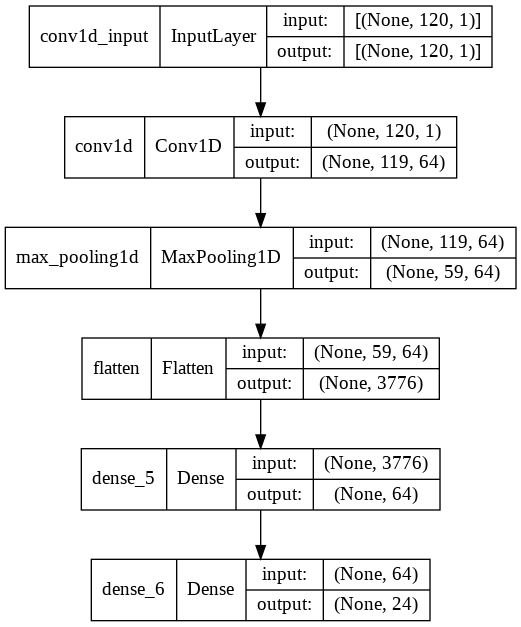

In [23]:
plot_model(cnnmodel, to_file='my_cnn_dayahead.png', show_shapes=True, show_layer_names=True)

In [24]:
history = cnnmodel.fit(trainX,trainY,epochs=80,validation_data=(testX,testY))

Epoch 1/80
23/23 [==============================] - 1s 13ms/step - loss: 0.1428 - val_loss: 0.2058
Epoch 2/80
23/23 [==============================] - 0s 9ms/step - loss: 0.1319 - val_loss: 0.1904
Epoch 3/80
23/23 [==============================] - 0s 10ms/step - loss: 0.1216 - val_loss: 0.1755
Epoch 4/80
23/23 [==============================] - 0s 8ms/step - loss: 0.1121 - val_loss: 0.1622
Epoch 5/80
23/23 [==============================] - 0s 8ms/step - loss: 0.1037 - val_loss: 0.1508
Epoch 6/80
23/23 [==============================] - 0s 10ms/step - loss: 0.0964 - val_loss: 0.1408
Epoch 7/80
23/23 [==============================] - 0s 8ms/step - loss: 0.0898 - val_loss: 0.1315
Epoch 8/80
23/23 [==============================] - 0s 8ms/step - loss: 0.0836 - val_loss: 0.1226
Epoch 9/80
23/23 [==============================] - 0s 8ms/step - loss: 0.0776 - val_loss: 0.1141
Epoch 10/80
23/23 [==============================] - 0s 9ms/step - loss: 0.0719 - val_loss: 0.1059
Epoch 11/80
23/2

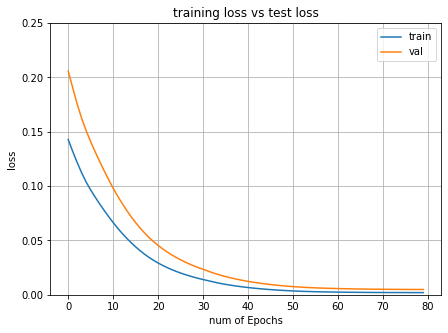

In [25]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
xc=range(80)
plt.figure(1,figsize=(7,5))
ax = plt.gca()
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('training loss vs test loss')
plt.grid(True)
ax.set_ylim([0,0.25])
plt.legend(['train','val'])

In [ ]:
y_hat_train_cnn = cnnmodel.predict(trainX)
y_hat_test_cnn = cnnmodel.predict(testX)

In [ ]:
print(trainY.shape)
trainY=trainY.reshape(730,24)
print(trainY[0])
print(trainY.shape)
print(y_hat_train_cnn.shape)
print(y_hat_train_cnn[0])
testY=testY.reshape(360,24)
trainY

(730, 24)
[0.42844474 0.43725154 0.43278699 0.43119687 0.42813895 0.41868999
 0.43740444 0.46596538 0.47088863 0.49149899 0.47336554 0.45584368
 0.45260229 0.43275641 0.42875054 0.42578436 0.44284753 0.45850407
 0.4955966  0.52681793 0.49113204 0.46296863 0.44960553 0.41731393]
(730, 24)
(730, 24)
[0.4080566  0.41262907 0.39091384 0.38153854 0.35548455 0.383773
 0.457822   0.3847168  0.4603741  0.43759248 0.4556978  0.47048566
 0.37834945 0.38799676 0.32127988 0.38587445 0.39293936 0.40090534
 0.47086462 0.4562696  0.5128917  0.4074522  0.46865344 0.41256297]


array([[0.42844474, 0.43725154, 0.43278699, ..., 0.46296863, 0.44960553,
        0.41731393],
       [0.42963733, 0.41930157, 0.4151428 , ..., 0.49379243, 0.48409883,
        0.45844291],
       [0.44523271, 0.42905633, 0.42862822, ..., 0.51406642, 0.45263287,
        0.43715981],
       ...,
       [0.37337166, 0.37584857, 0.37578741, ..., 0.32832854, 0.31976638,
        0.27557948],
       [0.27545716, 0.27561005, 0.25906672, ..., 0.38022139, 0.37698   ,
        0.37080301],
       [0.35710354, 0.32952113, 0.31939943, ..., 0.37612378, 0.37080301,
        0.36104825]])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score, mean_absolute_error

train_mae_cnn = mean_absolute_error(trainY, y_hat_train_cnn)
test_mae_cnn = mean_absolute_error(testY, y_hat_test_cnn)

train_mape_cnn = mean_absolute_percentage_error(trainY, y_hat_train_cnn)
test_mape_cnn = mean_absolute_percentage_error(testY,y_hat_test_cnn)

train_mse_cnn = mean_squared_error(trainY, y_hat_train_cnn)
test_mse_cnn = mean_squared_error(testY,y_hat_test_cnn)

print('Training MAE :',train_mae_cnn)
print('Training MAPE :',train_mape_cnn)
print('Training MSE :',train_mse_cnn)
print('\nTest MAE :',test_mae_cnn)


print('Testing MAPE :',test_mape_cnn)


print('Test MSE :',test_mse_cnn)

Training MAE : 0.03981455390898678
Training MAPE : 75389484951.38408
Training MSE : 0.0028943294232927214

Test MAE : 0.05744754241966448
Testing MAPE : 0.13342646026217608
Test MSE : 0.005711017394023928


In [ ]:
cnn_pred =y_hat_test_cnn.reshape(8640,-1)

In [ ]:
df_pred = pd.DataFrame(cnn_pred)

In [ ]:
dir = "/content/gdrive/My Drive/Colab_Notebooks/data_"
#path = '/content/gdrive/My Drive/Colab_Notebooks/data_/Forecast_cnn.csv'
df_pred.to_csv("Forecast_cnn.csv")

In [ ]:
df_pred.head()

,0
0,0.362484
1,0.358690
2,0.347479
3,0.334100
4,0.310519


In [ ]:
fnn_pred =test_y_hat.reshape(8640,-1) 

In [ ]:
df_pred = pd.DataFrame(fnn_pred)
df_pred.to_csv("Forecast_fnn.csv")